BloomTech Data Science

*Unit 2, Sprint 1, Module 1*

---

In [ ]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'

# Module Project: Regression I

During the guided project, we predicted how much it would cost to buy a condo in Tribecca. For the module project, your goal will be similar: predict how much it costs to rent an apartment in New York City.

Dataset source: [renthop.com](https://www.renthop.com/).

## Directions

> Do Not Copy-Paste. You must *type* each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.
>
> — Zed Shaw, [Learn Python the Hard Way](https://learnpythonthehardway.org/)

The tasks for this project are as follows:

- **Task 1:** Import `csv` file using wrangle function.
- **Task 2:** Conduct exploratory data analysis (EDA) and plot the relationship between one feature and the target `'price'`.
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Establish the baseline mean absolute error for your dataset.
- **Task 5:** Build and train a `Linearregression` model.
- **Task 6:** Check the mean absolute error of our model on the training data.
- **Task 7:** Extract and print the intercept and coefficient from your `LinearRegression` model.

**Note**

You should limit yourself to the following libraries for this project:

- `matplotlib`
- `numpy`
- `pandas`
- `sklearn`

## I. Wrangle Data

In [ ]:
# Import necessary packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

In [ ]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
    
    # Remove the most extreme 1% prices,
    # the most extreme .1% latitudes, &
    # the most extreme .1% longitudes
    df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
            (df['price'] <= np.percentile(df['price'], 99.5)) & 
            (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
            (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
            (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
            (df['longitude'] <= np.percentile(df['longitude'], 99.95))]
    
    return df

filepath = DATA_PATH + 'apartments/renthop-nyc.csv'

**Task 1:** Use the above `wrangle` function to import the `renthop-nyc.csv` file into a DataFrame named `df`.

In [ ]:
# Read renthop nyc data using the wrangle function
df = wrangle(filepath)

**Task 2:** Use your `pandas` and dataviz skills to explore the dataset. As part of this process, make a scatter plot that shows the relationship between one of the numerical features in the dataset and the target `'price'`.

**Remember:** You should plot your feature on the `X` axis and your target on the `y` axis.

In [ ]:
# EDA
# Check the shape of the dataset
print(df.shape)

# Print the first few rows 
df.head(10)

(48817, 34)


,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,...,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,...,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,...,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,...,0,0,0,0,0,0,0,0,0,0
5,2.0,4,2016-04-19 04:24:47,,West 18th Street,40.7429,-74.0028,7995,350 West 18th Street,medium,...,0,0,0,0,0,0,0,0,0,0
6,1.0,2,2016-04-27 03:19:56,Stunning unit with a great location and lots o...,West 107th Street,40.8012,-73.9660,3600,210 West 107th Street,low,...,0,0,0,0,0,0,0,0,0,0
7,2.0,1,2016-04-13 06:01:42,"This huge sunny ,plenty of lights 1 bed/2 bath...",West 21st Street,40.7427,-73.9957,5645,155 West 21st Street,low,...,0,0,0,0,1,0,0,0,0,0
8,1.0,1,2016-04-20 02:36:35,<p><a website_redacted,Hamilton Terrace,40.8234,-73.9457,1725,63 Hamilton Terrace,medium,...,0,0,0,0,0,0,0,0,0,0
9,2.0,4,2016-04-02 02:58:15,This is a spacious four bedroom with every bed...,522 E 11th,40.7278,-73.9808,5800,522 E 11th,low,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Check the columns and if there are missing values in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48817 entries, 0 to 49351
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bathrooms             48817 non-null  float64
 1   bedrooms              48817 non-null  int64  
 2   created               48817 non-null  object 
 3   description           47392 non-null  object 
 4   display_address       48684 non-null  object 
 5   latitude              48817 non-null  float64
 6   longitude             48817 non-null  float64
 7   price                 48817 non-null  int64  
 8   street_address        48807 non-null  object 
 9   interest_level        48817 non-null  object 
 10  elevator              48817 non-null  int64  
 11  cats_allowed          48817 non-null  int64  
 12  hardwood_floors       48817 non-null  int64  
 13  dogs_allowed          48817 non-null  int64  
 14  doorman               48817 non-null  int64  
 15  dishwasher         

**Comment:** There are some missing values in the data but none of them in our numerical variables.

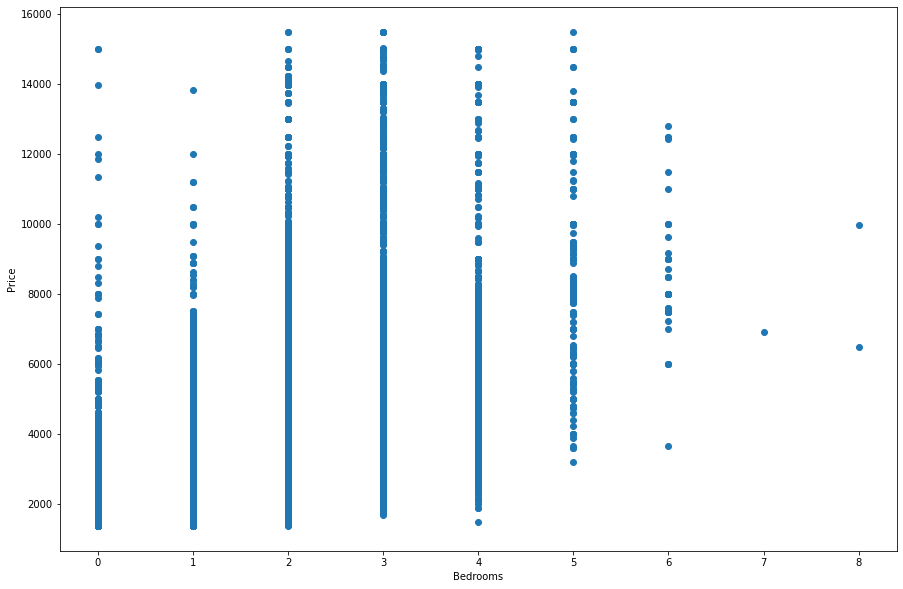

In [ ]:
# Create scatter plot to visualize the relationship between feature 'bedrooms' and target 'price'
plt.figure(figsize=(15, 10))
plt.scatter(x= df['bedrooms'], y= df['price'])
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show();

**Comment:** It doesn't seem to be a clear linear relationship between our variables `bedrooms` and `price`.

#  II. Split Data

**Task 3:** Choose one feature from the dataset and assign it to your feature matrix `X`. Then assign the column `'price'` to the target vector `y`.

**Remember:** Your feature matrix needs to be two-dimensional, but your target vector must be one-dimensional.

In [ ]:
# Split data into feature matrix and target vector
X = df[['bedrooms']] #2D 
y = df['price'] #1D

In [ ]:
# Check the shape 
X.shape, y.shape

((48817, 1), (48817,))

# III. Establish Baseline

**Task 4:** Since this is a **regression** problem, you need to calculate the baseline the mean absolute error for your model. First, calculate the mean of `y`. Next, create a list `y_pred` that has the same length as `y` and where every item in the list is the mean. Finally, use `mean_absolute_error` to calculate your baseline.

In [ ]:
# Calculate the mean of y
y_mean = y.mean()
y_mean

3579.5852469426636

In [ ]:
# Create y_pred list with the same length as y and where every item is the mean
y_pred = [y_mean] * len(y)
y_pred

[3579.5852469426636,
 3579.5852469426636,
 3579.5852469426636,
 3579.5852469426636,
 3579.5852469426636,
 3579.5852469426636,
 3579.5852469426636,
 3579.5852469426636,
 3579.5852469426636,
 3579.5852469426636,
 3579.5852469426636,
 3579.5852469426636,
 3579.5852469426636,
 3579.5852469426636,
 3579.5852469426636,
 3579.5852469426636,
 3579.5852469426636,
 3579.5852469426636,
 3579.5852469426636,
 3579.5852469426636,
 3579.5852469426636,
 3579.5852469426636,
 3579.5852469426636,
 3579.5852469426636,
 3579.5852469426636,
 3579.5852469426636,
 3579.5852469426636,
 3579.5852469426636,
 3579.5852469426636,
 3579.5852469426636,
 3579.5852469426636,
 3579.5852469426636,
 3579.5852469426636,
 3579.5852469426636,
 3579.5852469426636,
 3579.5852469426636,
 3579.5852469426636,
 3579.5852469426636,
 3579.5852469426636,
 3579.5852469426636,
 3579.5852469426636,
 3579.5852469426636,
 3579.5852469426636,
 3579.5852469426636,
 3579.5852469426636,
 3579.5852469426636,
 3579.5852469426636,
 3579.5852469

In [ ]:
# Calculate baseline mean absolute error
baseline_mae = mean_absolute_error(y, y_pred)
print('Baseline MAE:', baseline_mae)

Baseline MAE: 1201.532252154329


# IV. Build Model

**Task 5:** Build and train a `LinearRegression` model named `model` using your feature matrix `X` and your target vector `y`.

In [ ]:
# Step 1: Import predictor class
# Predictor class was imorted at the beginning of this notebook

# Step 2: Instantiate predictor
model = LinearRegression()

# Step 3: Fit predictor on the (training) data
model.fit(X, y)

LinearRegression()

# V. Check Metrics

**Task 6:** How does your model perform in comparison to your baseline? Calculate the mean absolute error for your model's predictions.

In [ ]:
# Make predictions
lr_prediction = model.predict(X)
lr_prediction

array([4827.78691363, 3974.52050515, 3121.25409666, ..., 3121.25409666,
       2267.98768818, 3974.52050515])

In [ ]:
# Calculate training mean absolute error
training_mae = mean_absolute_error(y, lr_prediction)
print('Training MAE:', training_mae)

Training MAE: 975.6496767374764


**Comment:** We achieved a lower MAE in our regression model compared to the MAE value of our baseline. This means that the model performs better than the baseline.

# VI. Communicate Results 

You've just created a linear model. That means that your model makes predictions using an equation that looks like $\texttt{apt price} = \texttt{intercept}~+~\texttt{coefficient}~\times~\texttt{your feature}$. But what are the values of the intercept and coefficient that your model is using? 

**Task 7:** Print out the intercept and coefficient associated with `model`.

In [ ]:
# Print out the parameters
intercept = round(model.intercept_)
print('Intercept:', intercept)
coefficient = round(model.coef_[0])
print('Coefficient/Slope:',coefficient)

# In equation form
print(f'Apt Price = {intercept} + {coefficient} * Bedrooms')

Intercept: 2268
Coefficient/Slope: 853
Apt Price = 2268 + 853 * Bedrooms


**Comment:** The intercept tells us that even when the apartment has 0 bedrooms -perhaps is a studio- it could be rented for about $2,268.

The coefficient tells us that for every additional bedroom, the rent price increases by an average of $853.

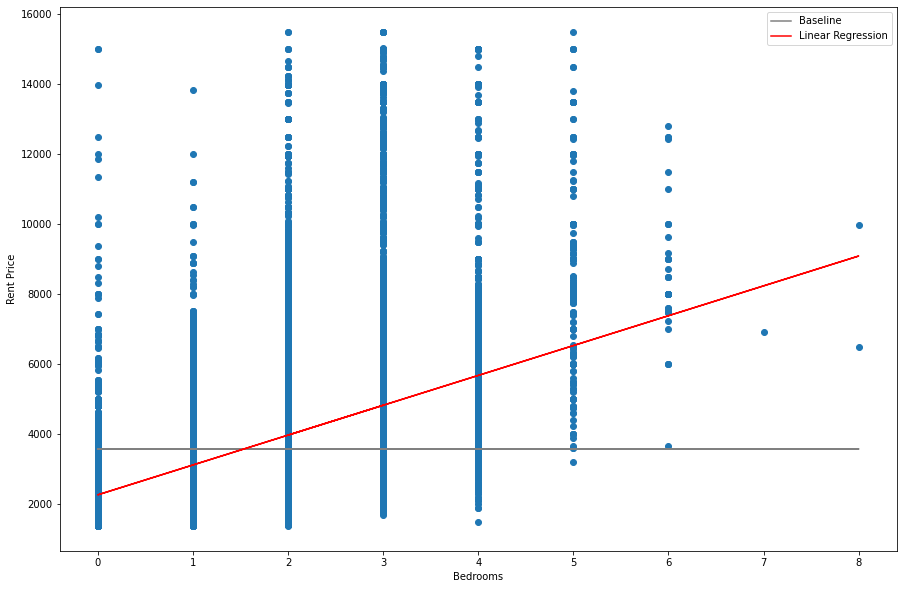

In [ ]:
# Plotting baseline and our model to interpret the differences between the two methods
plt.figure(figsize = (15, 10))
plt.scatter(X,y)
plt.plot(X, y_pred, label = 'Baseline', color = 'gray')
plt.plot(X, lr_prediction, label = 'Linear Regression', color = 'red')
plt.xlabel('Bedrooms')
plt.ylabel('Rent Price')
plt.legend()
plt.show();